![This is an image](https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview.png)
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: SARAVANAVEL***

# ***ADVANCED LEVEL TASK***
### Task 10 -Facial recognition to detect mood in images and suggest songs


## 1. Import Libraries/Packages

In [1]:
import numpy as np
import cv2
import os
import random
from skimage.io import imread
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D,MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import Audio


In [2]:
print("TensorFlow version :", tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

TensorFlow version : 2.6.0
Num GPUs Available:  1


## Downloading and unziping the data from kaggle

In [3]:
os.environ['KAGGLE_USERNAME'] ="saravanavelv" # username from the json file
os.environ['KAGGLE_KEY'] = "9aa988177e35775b47a38f11fdf2931f" # key from the json file

In [4]:
!kaggle datasets download -d msambare/fer2013

 76% 46.0M/60.3M [00:00<00:00, 152MB/s]
100% 60.3M/60.3M [00:00<00:00, 153MB/s]


In [5]:
!ls

fer2013.zip  sample_data


In [6]:
!mkdir dataset

In [7]:
!unzip -q fer2013.zip -d dataset/

In [8]:
!ls

dataset  fer2013.zip  sample_data


In [9]:
!ls dataset/

test  train


In [10]:
!ls dataset/train

angry  disgust	fear  happy  neutral  sad  surprise


## Data Visualization

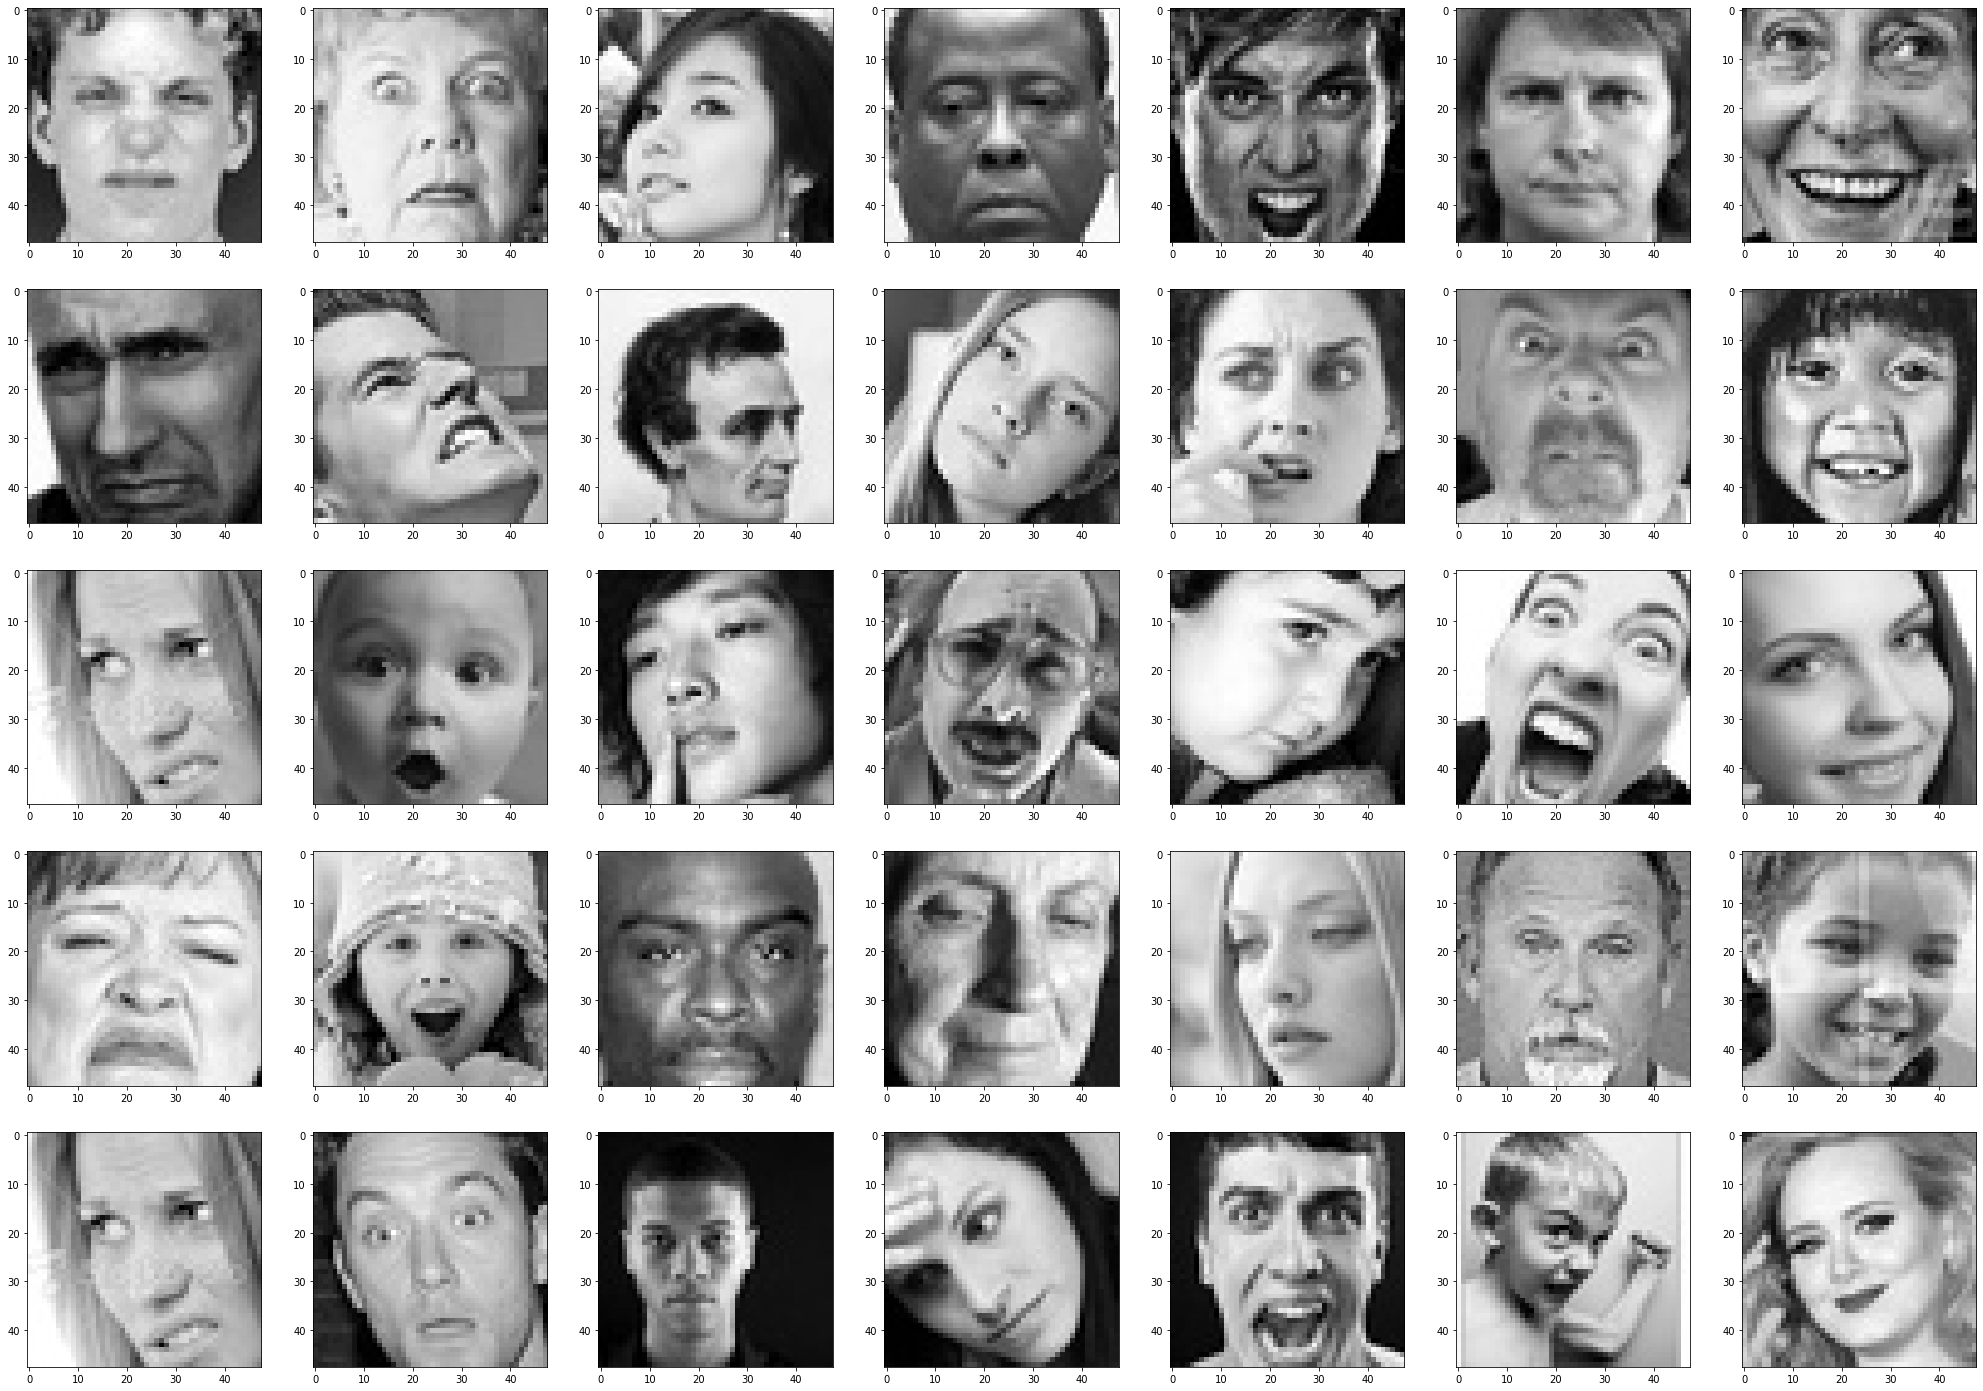

In [11]:
from skimage.io import imread
train_dir = "dataset/train/"
test_dir = "dataset/test/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

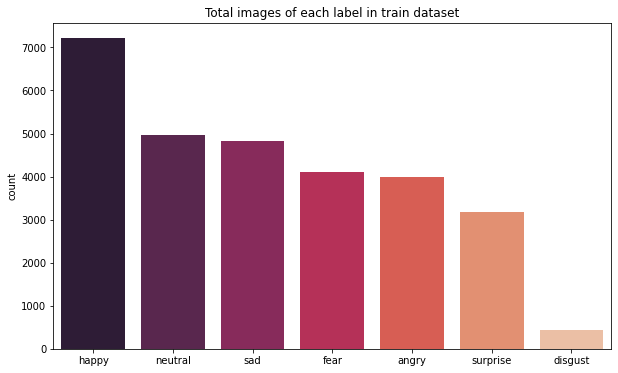

In [12]:
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="rocket", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


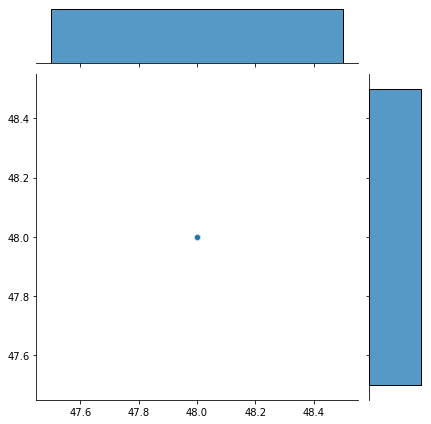

In [13]:
happy = os.listdir(train_dir+'happy/')
dim1, dim2 = [], []

for img_filename in happy:
    img = imread(train_dir+'happy/'+img_filename)
    d1, d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)
sns.jointplot(dim1, dim2)
plt.show()

## Data Preprocessing

In [14]:
train_gen = ImageDataGenerator(rescale=1/255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1/255)

img_shape = (int(np.mean(dim1)), int(np.mean(dim2)), 1)

train_generator = train_gen.flow_from_directory(directory=train_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_gen.flow_from_directory(directory=test_dir,
                                                target_size=(img_shape[0], img_shape[1]),
                                                color_mode='grayscale',
                                                batch_size=64,
                                                class_mode='categorical',
                                                shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Create the Model

In [15]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0

## Train the model

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001, 
                             decay=1e-6), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = test_generator.n // test_generator.batch_size
num_epochs = 200

history = model.fit(train_generator,
                    epochs=num_epochs,
                    verbose=1,
                    #callbacks=callbacks,
                    validation_data=test_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_steps=validation_steps)

Epoch 1/200
448/448 [==============================] - 69s 86ms/step - loss: 1.8870 - accuracy: 0.2229 - val_loss: 2.1192 - val_accuracy: 0.2045
Epoch 2/200
448/448 [==============================] - 38s 84ms/step - loss: 1.8065 - accuracy: 0.2436 - val_loss: 1.7834 - val_accuracy: 0.2620
Epoch 3/200
448/448 [==============================] - 38s 84ms/step - loss: 1.7931 - accuracy: 0.2502 - val_loss: 1.7638 - val_accuracy: 0.2729
Epoch 4/200
448/448 [==============================] - 37s 84ms/step - loss: 1.7798 - accuracy: 0.2582 - val_loss: 1.7679 - val_accuracy: 0.2698
Epoch 5/200
448/448 [==============================] - 38s 84ms/step - loss: 1.7718 - accuracy: 0.2645 - val_loss: 1.7006 - val_accuracy: 0.3133
Epoch 6/200
448/448 [==============================] - 38s 84ms/step - loss: 1.7491 - accuracy: 0.2819 - val_loss: 1.6637 - val_accuracy: 0.3294
Epoch 7/200
448/448 [==============================] - 38s 84ms/step - loss: 1.7291 - accuracy: 0.2965 - val_loss: 1.6944 - val_ac

In [18]:
model.save("model.h5")

## Evaluate the model

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 4s 31ms/step - loss: 1.1528 - accuracy: 0.6028
validation accuracy : 60.28141379356384%
validation loss : 1.152774453163147


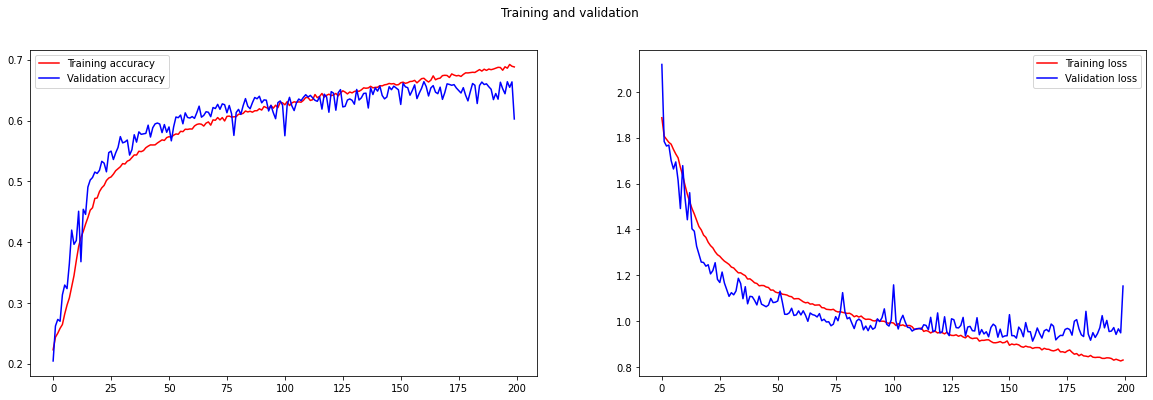

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

## confusion matrix

              precision    recall  f1-score   support

       angry       0.58      0.47      0.52       958
     disgust       0.66      0.26      0.37       111
        fear       0.55      0.26      0.35      1024
       happy       0.84      0.84      0.84      1774
     neutral       0.47      0.69      0.56      1233
         sad       0.44      0.57      0.49      1247
    surprise       0.82      0.63      0.72       831

    accuracy                           0.60      7178
   macro avg       0.62      0.53      0.55      7178
weighted avg       0.63      0.60      0.60      7178





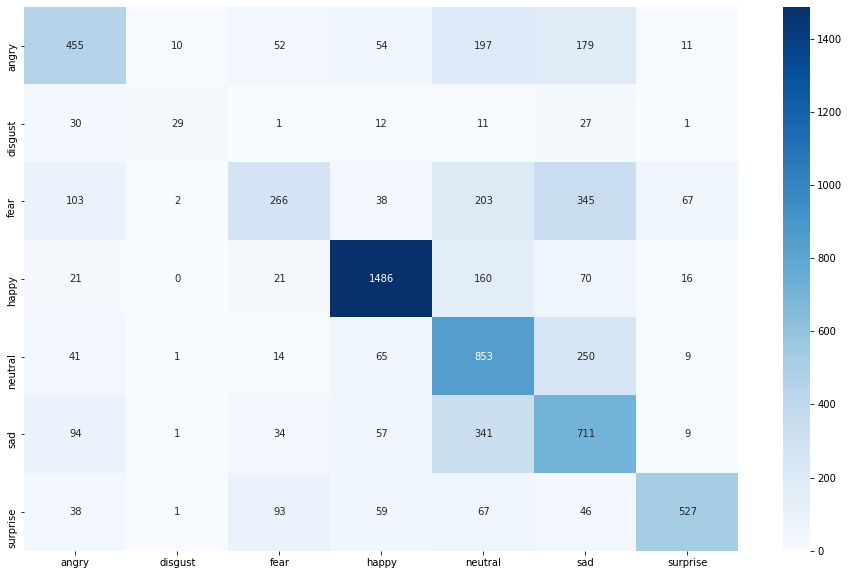

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_generator), axis=-1)
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='.0f', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

## Testing our model with new image

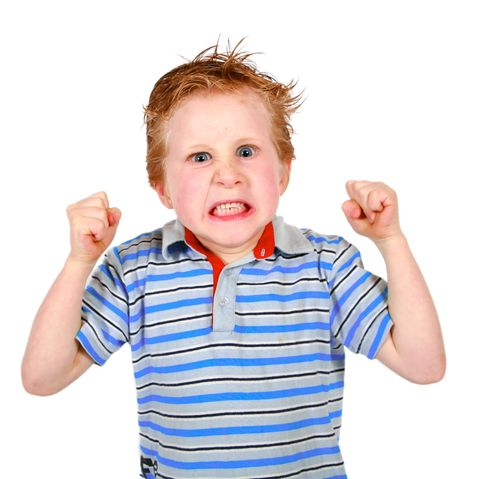

In [23]:
image = cv2.imread("images/img 1.jpg")
from IPython.display import Image
Image(filename='for/ab.jpg') 

## Model Prediction

In [24]:
import cv2
from tensorflow.python.keras.models import load_model
import os


# # load the trained model
model = load_model("model.h5")
# A list of emoticon categories
EMOTIONS = ['Angry', 'Disgust', 'Happy', 'Sad', 'Surprise', 'Neutral']
# Load image
img = image

# Trim the image to 48 x 48, and turn the grayscale image, normalization
frame = cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) / 255.0

# Reinvent the image dimension
gray = gray.reshape(1,48,48,1)

# Output the prediction
predicts = model.predict(gray)[0]
label = EMOTIONS[predicts.argmax()]
for (i,j) in zip(range(7),EMOTIONS):
    predictss = predicts[i]
    print("{:^10s}".format(j)+"prediction rate is   {0:.2f}%".format(predictss))
print( "\n\n The system considers this expression to be:",label)


  Angry   prediction rate is   0.28%
 Disgust  prediction rate is   0.10%
  Happy   prediction rate is   0.19%
   Sad    prediction rate is   0.03%
 Surprise prediction rate is   0.09%
 Neutral  prediction rate is   0.15%


 The system considers this expression to be: Angry


## Song Recommdation

In [25]:
if (label=='Angry'):
    path="song\\Angry\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Angry\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Disgust'):
    path="song\\Disgust\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Disgust\\'+ d,autoplay=True)
    display(audio)
    
elif (label=="Happy"):
    path="song\\Happy\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Happy\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Sad'):
    path="song\\Sad\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Sad\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Surprise'):
    path="song\\Surprise\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Surprise\\'+ d,autoplay=True)
    display(audio)
    
elif (label=='Neutral'):
    path="song\\Neutral\\"
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing:",d)
    audio = Audio(filename='song\\Neutral\\'+ d,autoplay=True)
    display(audio)

Now Playing: Angry Mood Off-Bgm.mp3


## THANK YOU!!